***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [3]:
df = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [4]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [5]:
classes = [
    df['Renda'].min(),
    778 * 2,
    778 * 5,
    778 * 15,
    778 * 25,
    df['Renda'].max()
]

### 2º Definir os labels das classes

In [6]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [7]:
df['Classe'] = pd.cut(x=df['Renda'], bins=classes, labels=labels, include_lowest=True )
df['Classe'].value_counts()

E    49289
D    18948
C     7356
B      826
A      421
Name: Classe, dtype: int64

### 4º Construir a coluna de percentuais

In [8]:
df['Classe'].value_counts(normalize=True) * 100

E    64.144977
D    24.659032
C     9.573139
B     1.074961
A     0.547892
Name: Classe, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [9]:
df_agg = pd.DataFrame(data={'Frequencia': df['Classe'].value_counts(), 
                   'Porcentagem':df['Classe'].value_counts(normalize=True) * 100})

df_agg

,Frequencia,Porcentagem
E,49289,64.144977
D,18948,24.659032
C,7356,9.573139
B,826,1.074961
A,421,0.547892


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<AxesSubplot:>

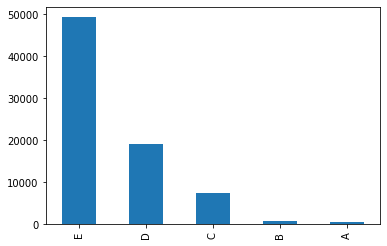

In [10]:
df_agg['Frequencia'].plot.bar()

> ### Conclusões

Escreva suas conclusões aqui...

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [11]:
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Classe
0,11,0,23,8,12,800,1.603808,E
1,11,1,23,2,12,1150,1.739790,E
2,11,1,35,8,15,880,1.760444,E
3,11,0,46,2,6,3500,1.783158,D
4,11,1,47,8,9,150,1.690631,E
...,...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030,E
76836,53,0,30,4,7,1500,1.792934,E
76837,53,0,32,8,12,1300,1.830587,E
76838,53,0,57,8,4,1500,1.726344,E


/home/gusalmeida93/.local/share/virtualenvs/cursos-BDLjCnS9/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Idade', ylabel='Density'>

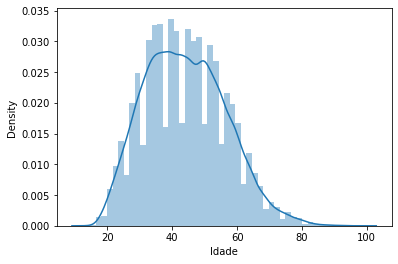

In [12]:
sns.distplot(df['Idade'])

<AxesSubplot:ylabel='Frequency'>

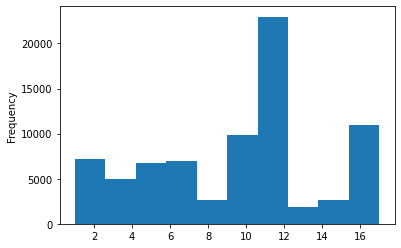

In [13]:
df['Anos de Estudo'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

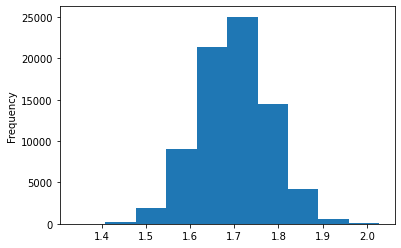

In [14]:
df['Altura'].plot.hist()

> ### Conclusões

Escreva suas conclusões aqui...

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<AxesSubplot:ylabel='Frequency'>

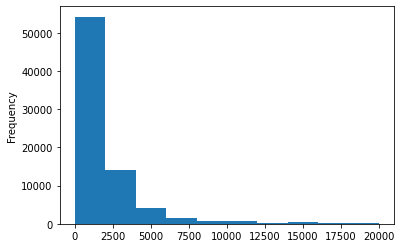

In [15]:
df[df['Renda'] <= 20000]['Renda'].plot.hist()

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [16]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [17]:
frequencia = pd.crosstab(df['Sexo'], df['Cor'])
frequencia = frequencia.rename(index = sexo)
frequencia = frequencia.rename(columns=cor)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [18]:
percentual = pd.crosstab(df['Sexo'], df['Cor'], normalize=True) * 100
percentual = percentual.rename(index = sexo)
percentual = percentual.rename(columns=cor)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [19]:
df['Renda'].mean()

2000.3831988547631

### Obtenha a mediana

In [20]:
df['Renda'].median()

1200.0

### Obtenha a moda

In [21]:
df['Renda'].mode()

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [22]:
df['Renda'].mad()

1526.4951371638058

### Obtenha a variância

In [23]:
df['Renda'].var()

11044906.006217021

### Obtenha o desvio-padrão

In [24]:
df['Renda'].std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [29]:
agg = pd.crosstab(df['Sexo'], df['Cor'], aggfunc=['mean', 'median', 'max'], values = df['Renda'])
agg = agg.rename(index = sexo)
agg = agg.rename(columns=cor)
agg

mean                                                      \
Cor           Indígena       Branca        Preta      Amarela        Parda   
Sexo                                                                         
Masculino  1081.710938  2925.744435  1603.861687  4758.251064  1659.577425   
Feminino   2464.386139  2109.866750  1134.596400  3027.341880  1176.758516   

            median                                      max                 \
Cor       Indígena  Branca   Preta Amarela   Parda Indígena  Branca  Preta   
Sexo                                                                         
Masculino    797.5  1700.0  1200.0  2800.0  1200.0    10000  200000  50000   
Feminino     788.0  1200.0   800.0  1500.0   800.0   120000  100000  23000   

                           
Cor       Amarela   Parda  
Sexo                       
Masculino   50000  100000  
Feminino    20000   30000

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [30]:
agg = pd.crosstab(df['Sexo'], df['Cor'], aggfunc=['mad', 'var', 'std'], values = df['Renda'])
agg = agg.rename(index = sexo)
agg = agg.rename(columns=cor)
agg

mad                                                     \
Cor           Indígena       Branca       Preta      Amarela        Parda   
Sexo                                                                        
Masculino   798.910889  2261.012346  975.602482  3709.597211  1125.827704   
Feminino   3007.892952  1670.967106  705.453357  2549.146322   811.580946   

                    var                                            \
Cor            Indígena        Branca         Preta       Amarela   
Sexo                                                                
Masculino  1.449841e+06  2.257002e+07  3.749294e+06  3.295707e+07   
Feminino   1.429818e+08  1.056909e+07  1.821960e+06  1.392166e+07   

                                  std                                        \
Cor               Parda      Indígena       Branca        Preta     Amarela   
Sexo                                                                          
Masculino  5.345747e+06   1204.093490  4750.791872  1936.309271  5740.82482   
Feminino   2.547960e+06  11957.498292  3251.013154  1349.799809  3731.17366   

                        
Cor              Parda  
Sexo                    
Masculino  2312.087184  
Feminino   1596.233048

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [33]:
df_boxplot = df[df['Renda'] <= 10000]

<AxesSubplot:xlabel='Renda', ylabel='Cor'>

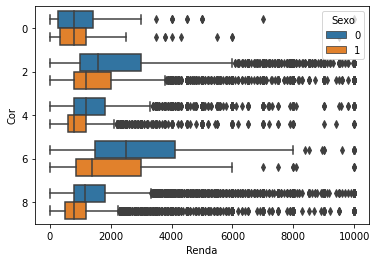

In [35]:
sns.boxplot(data=df_boxplot ,x='Renda', y='Cor', hue='Sexo', orient='h')

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [39]:
from scipy import stats

stats.percentileofscore(df['Renda'], 788, kind='weak')

28.86777719937533

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [38]:
df['Renda'].quantile(0.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [41]:
agg = pd.crosstab(df['Anos de Estudo'], df['Sexo'], aggfunc=['mean', 'median', 'max','std'], values = df['Renda'])
agg = agg.rename(index = anos_de_estudo)
agg = agg.rename(columns=sexo)
agg

mean                 median           \
Sexo                              Masculino     Feminino Masculino Feminino   
Anos de Estudo                                                                
Sem instrução e menos de 1 ano   799.494638   516.201748       700      390   
1 ano                            895.629047   492.771987       788      400   
2 anos                           931.178986   529.911638       788      450   
3 anos                          1109.203862   546.853916       800      500   
4 anos                          1302.329283   704.279111      1000      788   
5 anos                          1338.653218   781.389776      1045      788   
6 anos                          1448.875419   833.732824      1200      788   
7 anos                          1465.497940   830.751004      1200      788   
8 anos                          1639.396667   933.615351      1300      800   
9 anos                          1508.038850   868.021700      1200      788   
10 anos                         1731.270847   925.919225      1218      800   
11 anos                         2117.060504  1286.790889      1500     1000   
12 anos                         2470.330776  1682.313725      1800     1200   
13 anos                         3195.099154  1911.730047      2400     1300   
14 anos                         3706.620269  2226.460457      2500     1600   
15 anos ou mais                 6134.279790  3899.513231      4000     2800   
Não determinados                1295.761905   798.174419      1200      788   

                                     max                   std               
Sexo                           Masculino Feminino    Masculino     Feminino  
Anos de Estudo                                                               
Sem instrução e menos de 1 ano     30000    10000  1023.904884   639.311534  
1 ano                              30000     2000  1331.950552   425.291842  
2 anos                             40000     4000  1435.173827   498.234168  
3 anos                             80000     3500  2143.800133   424.124446  
4 anos                             50000    10000  1419.821787   629.553397  
5 anos                             35000     8000  1484.650587   635.782641  
6 anos                             25000     6000  1476.628602   574.547028  
7 anos                             40000     9000  1419.708673   602.038029  
8 anos                             30000    18000  1515.583715   896.781213  
9 anos                             60000    20000  2137.664774   973.221652  
10 anos                            45000     6000  2078.609734   620.611907  
11 anos                           200000   100000  2676.538942  1819.040417  
12 anos                            30000   120000  2268.081538  4851.833513  
13 anos                            25000    20000  2797.116800  2053.789771  
14 anos                            50000    20000  3987.214974  2064.083336  
15 anos ou mais                   200000   100000  7447.613594  4212.770709  
Não determinados                    7000     3000   979.648745   459.985964

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

> ### Conclusões

Escreva suas conclusões aqui...